## Principal Component Analysis

In [1]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

### Load Iris dataset

In [2]:
DataIris = pd.read_csv('IRIS.csv')
DataIris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Keeping the target variable for future reference
TargetVariable=DataIris['class']

# Dropping the target variable to get only predictors
# We will apply PCA only on the predictors
OnlyPredictors=DataIris.drop('class', axis=1)

OnlyPredictors.head()

,sepallength,sepalwidth,petallength,petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
# Extracting the target variable array y and Predictor variables array X
y = TargetVariable.values
X = OnlyPredictors.values


# Printing top 10 sample values
print(X[0:10])
print(y[0:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


### Applying PCA

In [5]:
# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=4)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-2.68  0.33 -0.02  0.  ]
 [-2.72 -0.17 -0.2   0.1 ]
 [-2.89 -0.14  0.02  0.02]
 [-2.75 -0.31  0.04 -0.08]
 [-2.73  0.33  0.1  -0.06]
 [-2.28  0.75  0.17 -0.03]
 [-2.82 -0.08  0.26 -0.05]
 [-2.63  0.17 -0.02 -0.05]
 [-2.89 -0.57  0.03 -0.03]
 [-2.67 -0.11 -0.19 -0.06]]


In [6]:
# The Amount of variance explained by each principle componnent
var_explained= pca.explained_variance_ratio_
print(np.round(var_explained,2))

# The first component and second component explain 92% and 5% variance of data respectively

[0.92 0.05 0.02 0.01]


In [7]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 92.46  97.76  99.48 100.  ]


### Finding optimal number of Principal components

Text(0, 0.5, '% Variance explained')

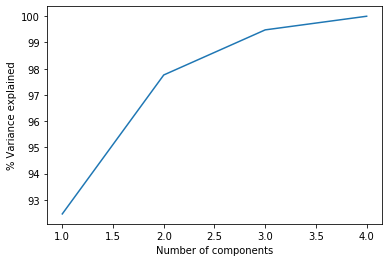

In [8]:
# By Looking at below graph we can see that 3 components are explaining maximum Variance in the dataset
# The elbow occurs at 3rd principal component
plt.plot( range(1,5), var_explained_cumulative )
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

### Creating final number of Principal Components

In [9]:
# Choosing 3-principal components based on above graph
pca = PCA(n_components=3)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

# Four Columns present in X are now represented by 3-Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[-2.68  0.33 -0.02]
 [-2.72 -0.17 -0.2 ]
 [-2.89 -0.14  0.02]
 [-2.75 -0.31  0.04]
 [-2.73  0.33  0.1 ]
 [-2.28  0.75  0.17]
 [-2.82 -0.08  0.26]
 [-2.63  0.17 -0.02]
 [-2.89 -0.57  0.03]
 [-2.67 -0.11 -0.19]]


In [10]:
# Printing the factor loadings
loadings = pca.components_
print(loadings)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]]


In [11]:
ReducedIris=pd.DataFrame(reduced_X, columns=['PC1','PC2','PC3'])
ReducedIris['Species']=y
ReducedIris.head()

,PC1,PC2,PC3,Species
0,-2.684207,0.326607,-0.021512,Iris-setosa
1,-2.715391,-0.169557,-0.203521,Iris-setosa
2,-2.889820,-0.137346,0.024709,Iris-setosa
3,-2.746437,-0.311124,0.037672,Iris-setosa
4,-2.728593,0.333925,0.096230,Iris-setosa
